In [2]:
%pip install geobr
%pip install geopandas
# %pip install h3
# %pip install h3pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 928 kB 7.9 MB/s 
     |████████████████████████████████| 16.7 MB 38.8 MB/s 
     |████████████████████████████████| 6.3 MB 35.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geobr
import lxml
import descartes
from shapely import wkt
import geopandas as gpd
# import h3
# from IPython.display import IFrame
# import h3pandas

# GeoBr

https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html

# Listando as bases, shapes

In [ ]:
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

# Extraindo a info

In [ ]:
brasil = geobr.read_state(year=2020)
brasil

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ..."


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.24759047175, -26.590499411249997, -35.70232894755, 7.222992030550001)

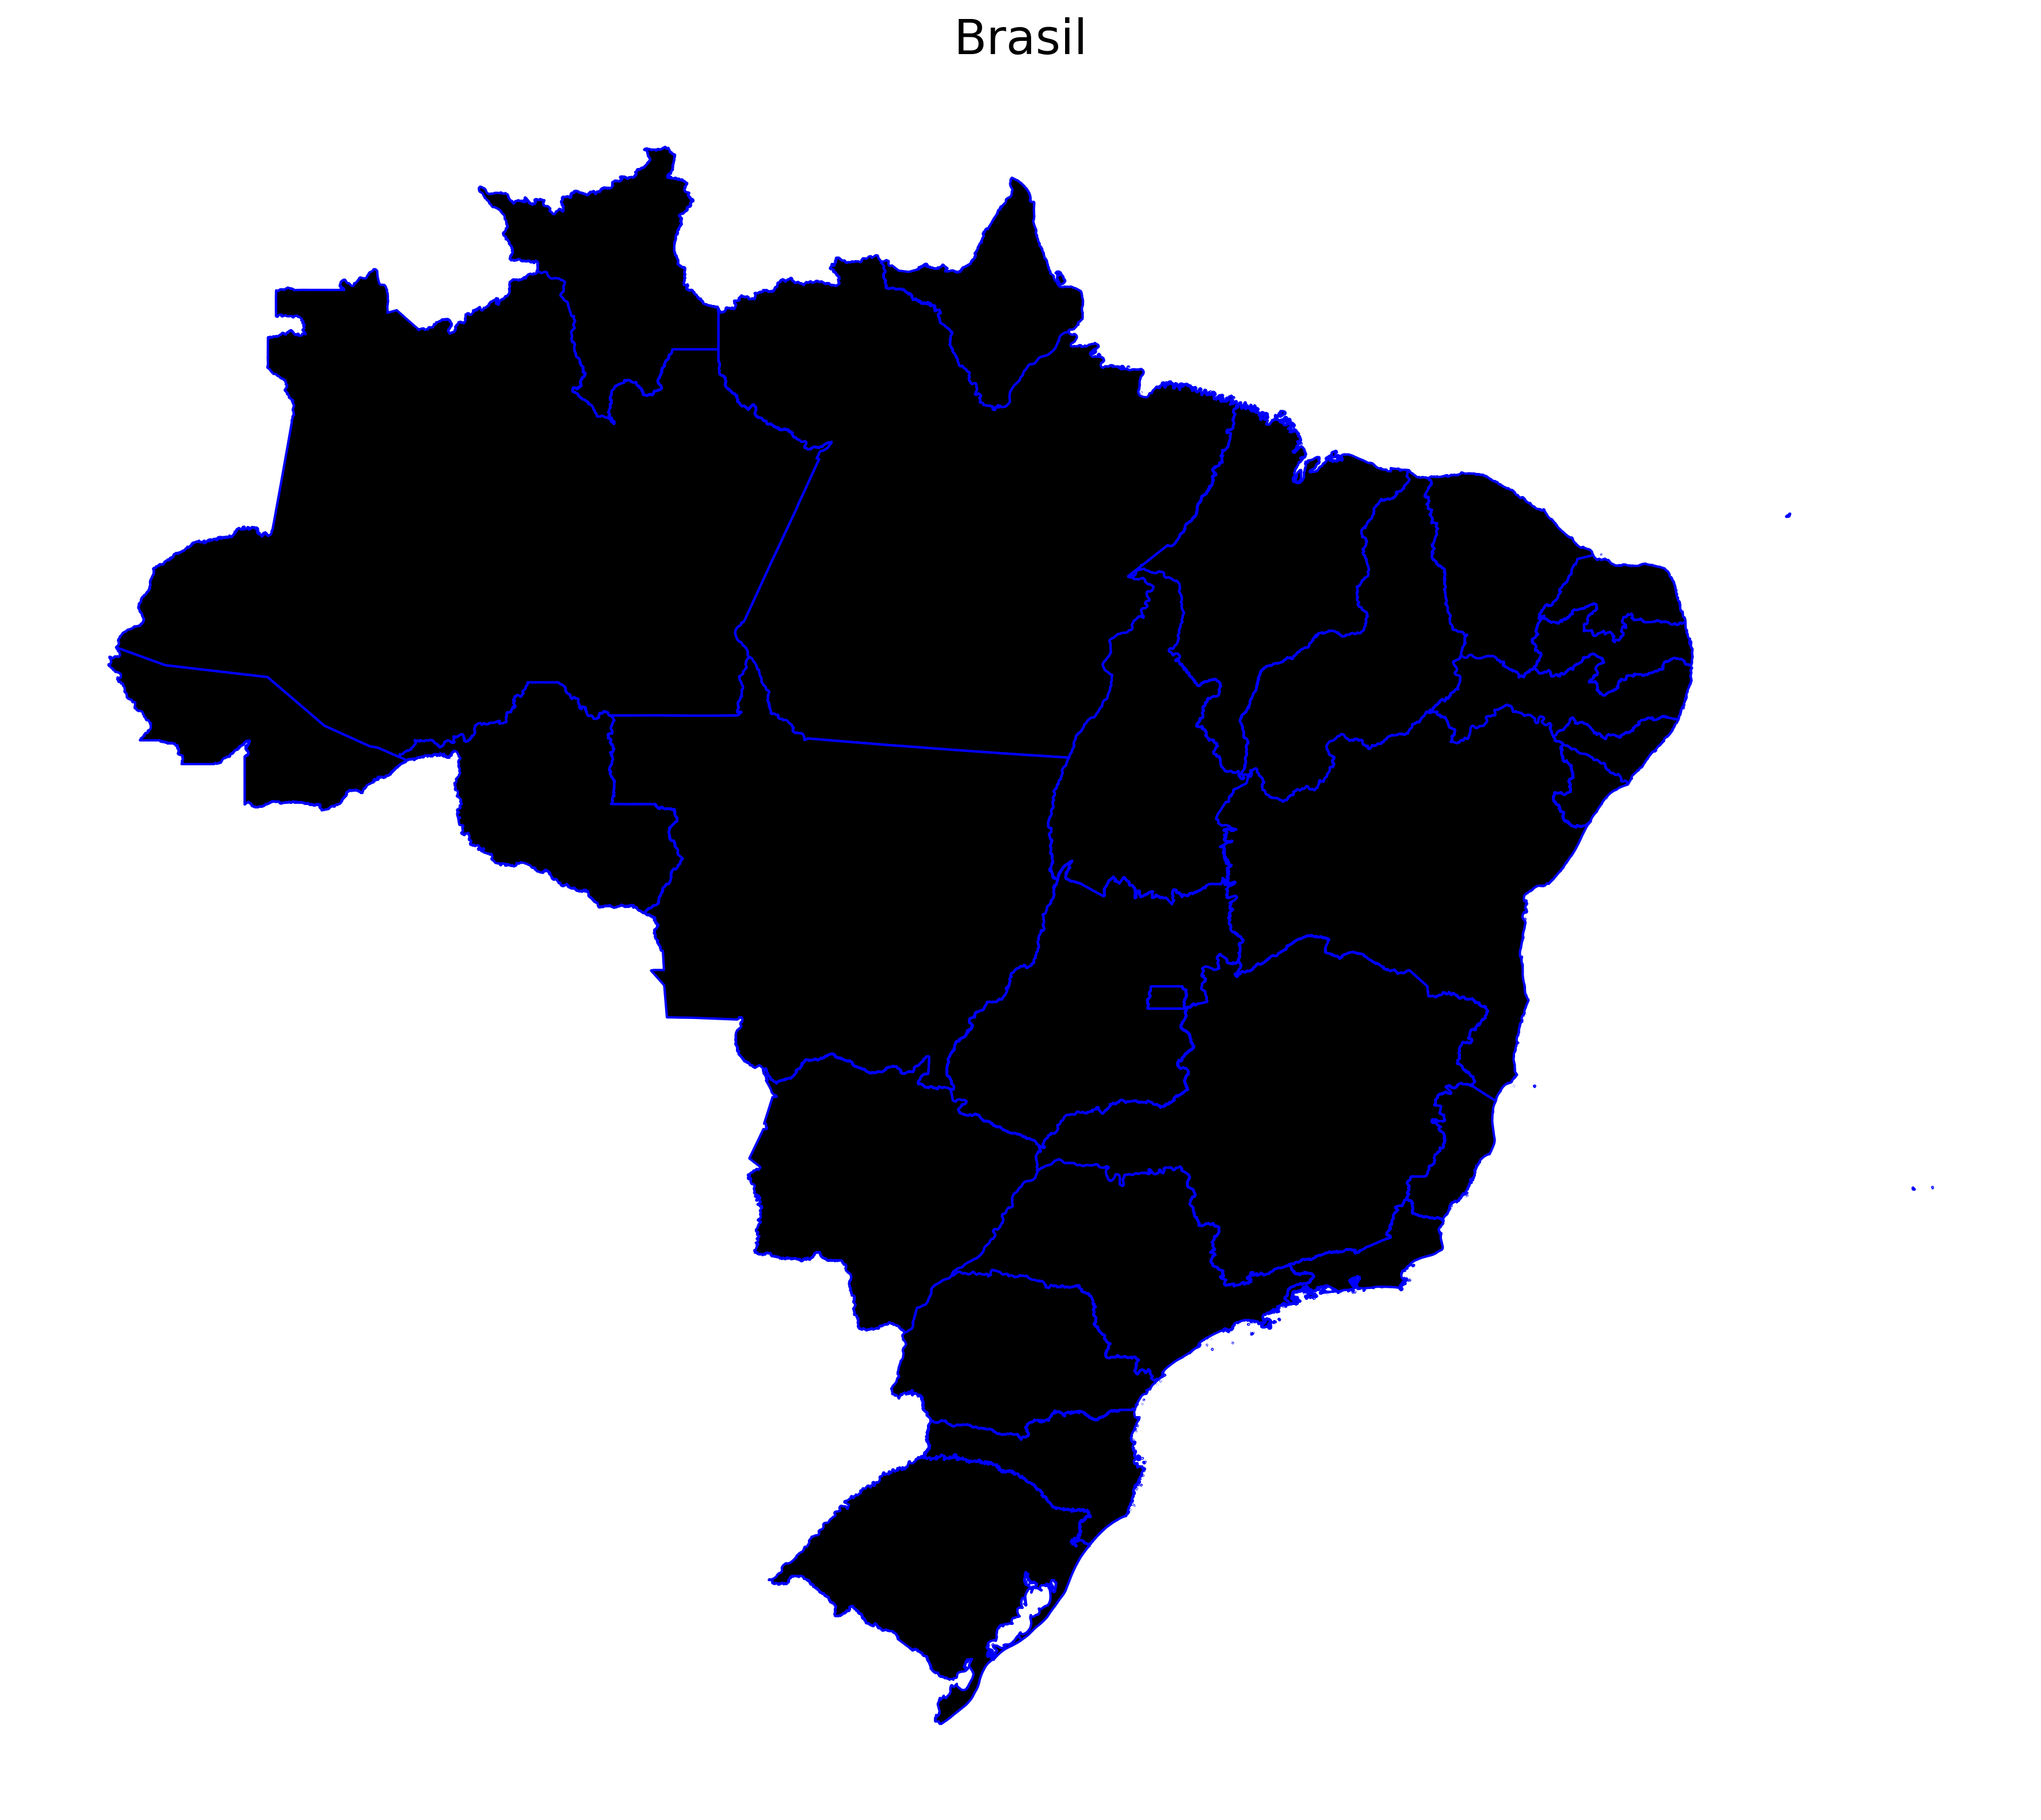

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15), dpi = 300)

brasil.plot(facecolor = "#2D3E50", edgecolor = "#FEBF57", ax = ax)

ax.set_title("Brasil", fontsize = 20)
ax.axis("off")

In [ ]:
parana = geobr.read_state(code_state="PR", year=2018)


/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-48.36381 -25.73616, -48.36555..."


# Para todo o Brasil

In [ ]:

ufs = ["AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"]

df_censo = []

for id, i in enumerate(ufs):
  census_tract = geobr.read_census_tract(year=2010, code_tract = i)
  census_tract["UF"] = i
  df_censo.append(census_tract)
  print(id,i)

final_df_censo = pd.concat(df_censo)
final_df_censo["lng"] = final_df_censo["geometry"].centroid.x  
final_df_censo["lat"]  = final_df_censo["geometry"].centroid.y
final_df_censo = final_df_censo[["code_tract","code_muni","zone","name_muni","name_neighborhood","name_district","UF","lng","lat","geometry"]]

def geo_to_h3_4(row):
  return h3.geo_to_h3(lat = row.lat, lng = row.lng, resolution = 4)

def geo_to_h3_5(row):
  return h3.geo_to_h3(lat = row.lat, lng = row.lng, resolution = 5)

final_df_censo["h3_4"] = final_df_censo.apply(geo_to_h3_4, axis = 1)
final_df_censo["h3_5"] = final_df_censo.apply(geo_to_h3_5, axis = 1)

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


0 AC
1 AL
2 AP
3 AM
4 BA
5 CE
6 DF
7 ES
8 GO
9 MA
10 MT
11 MS
12 MG
13 PA
14 PB
15 PR
16 PE
17 PI
18 RJ
19 RN
20 RS
21 RO
22 RR
23 SC
24 SP
25 SE
26 TO


/usr/local/lib/python3.7/dist-packages/geopandas/array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
/usr/local/lib/python3.7/dist-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.22686640912116, -26.71963481937726, -36.03107115607577, 7.379087524393744)

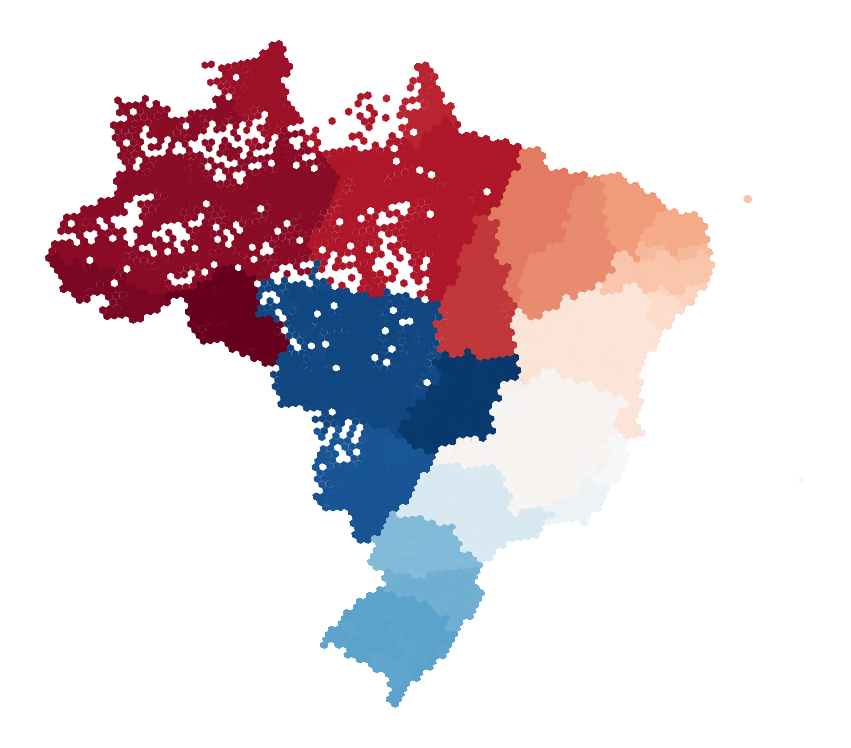

In [ ]:

gdf_h3 = final_df_censo.set_index("h3_4").h3.h3_to_geo_boundary()

ax = gdf_h3.plot(figsize=(15, 15), column='code_muni', cmap='RdBu')
ax.axis('off')